In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
Xtrain = np.load(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master\video_tampering_dataset\Xtrain.npy")
Ytrain = np.load(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master\video_tampering_dataset\Ytrain.npy")

In [4]:
print(Xtrain.shape)
print(Ytrain.shape)

(6990, 240, 320, 3)
(6990,)


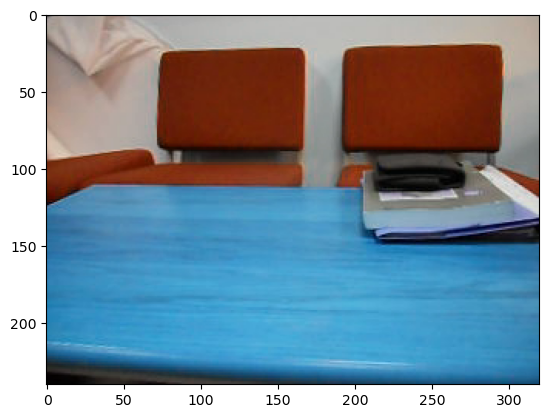

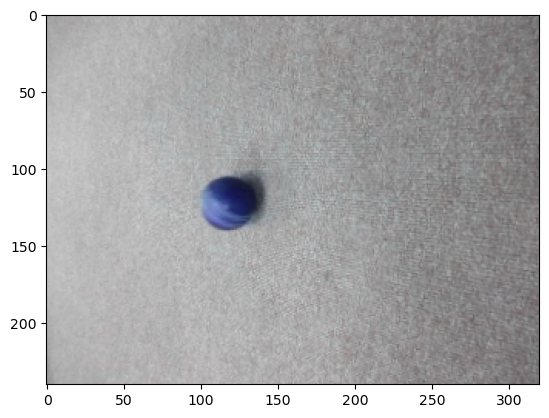

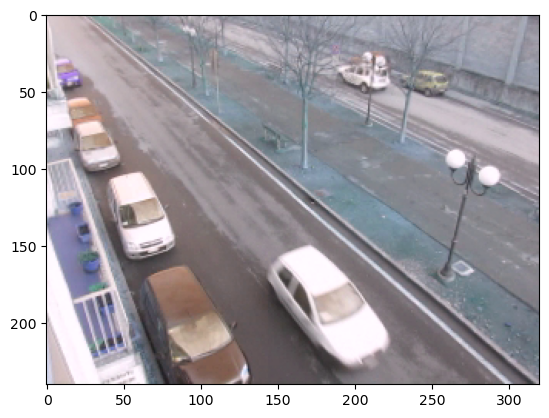

In [5]:
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])
    plt.imshow(Xtrain[r])
    plt.show()

# Resnet Model

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

In [8]:
model = ResNet50(input_shape=(240,320,3),include_top=False,weights='imagenet')

In [9]:
dr = Dropout(0.2)(model.output)
gap1 = GlobalAveragePooling2D()(dr)
fc1 = Dense(64,activation='relu')(gap1)
fc2 = Dense(1,activation='sigmoid')(fc1)

In [10]:
model_new = Model(inputs=model.input,outputs=fc2)

In [11]:
#for ix in range(len(model_new.layers)):
    #print(ix,model_new.layers[i])

In [12]:
#for ix in range(171):
    #model_new.layers[ix].trainable= False

In [13]:
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 246, 326, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 120, 160, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 60, 80, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 60, 80, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 60, 80, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 60, 80, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 30, 40, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 30, 40, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 30, 40, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 30, 40, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 15, 20, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 15, 20, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 15, 20, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 15, 20, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 15, 20, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 15, 20, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 15, 20, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 15, 20, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 10, 2048)  0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 10, 512)   1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 10, 512)  2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 10, 512)  0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [14]:
adam = Adam(lr=1e-4)

model_new.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\Fahmi Bakhir\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
from keras.callbacks import ModelCheckpoint

In [16]:
checkpoint = ModelCheckpoint(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master\ResNet50_Model\forgery_model.hdf5",save_best_only=True)

hist = model_new.fit(Xtrain,Ytrain,batch_size=32,epochs=10,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/10
175/175 [==============================] - 3188s 18s/step - loss: 0.6013 - accuracy: 0.7353 - val_loss: 0.5813 - val_accuracy: 0.7511
Epoch 2/10
175/175 [==============================] - 3494s 20s/step - loss: 0.5693 - accuracy: 0.7552 - val_loss: 0.5886 - val_accuracy: 0.7511
Epoch 3/10
175/175 [==============================] - 3192s 18s/step - loss: 0.5634 - accuracy: 0.7543 - val_loss: 0.5784 - val_accuracy: 0.7511
Epoch 4/10
175/175 [==============================] - 3223s 18s/step - loss: 0.5604 - accuracy: 0.7552 - val_loss: 0.5752 - val_accuracy: 0.7511
Epoch 5/10
175/175 [==============================] - 3264s 19s/step - loss: 0.5569 - accuracy: 0.7550 - val_loss: 0.5727 - val_accuracy: 0.7496
Epoch 6/10
175/175 [==============================] - 3167s 18s/step - loss: 0.5512 - accuracy: 0.7550 - val_loss: 0.5823 - val_accuracy: 0.7511
Epoch 7/10
175/175 [==============================] - 3160s 18s/step - loss: 0.5444 - accuracy: 0.7555 - val_loss: 0.5899 - val_ac